In [1]:
#Installing and importing packages
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading Data from CSV file
accidents = pd.read_csv("./data/accidents.csv")
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
#Figuring out the datatypes of variables
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [4]:
# #Dropping Variable of No use.
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 
                '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number',
                 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities'
               ], axis=1, inplace=True)

In [5]:
#Converting to DateTime format. 
accidents["Date"] = pd.to_datetime(accidents["Date"])

C:\Users\SJoshi\AppData\Local\Temp\ipykernel_16780\1486285418.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accidents["Date"] = pd.to_datetime(accidents["Date"])


In [6]:
#Figuring out total number of null values 
accidents.isnull().sum()
accidents = accidents[accidents['Time'].notna()]
accidents = accidents[accidents['Date'].notna()]

#making a new column called Hours to use it later for visualization
accidents["Hours"] = accidents["Time"].apply(lambda x: int(str(x).split(":")[0]))
accidents["Year"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[0]))
accidents["Month"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[1]))
accidents["Day"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[2].split(" ")[0]))

In [7]:
accidents.head(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42,...,2,2,0,0,1,1,17,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36,...,1,1,0,0,1,1,17,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15,...,1,1,0,0,1,1,0,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35,...,1,1,0,0,1,1,10,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13,...,1,2,0,0,1,1,21,2005,10,1


In [8]:
#Dropping Minutes That is of No use
accidents.drop(["Time"], axis=1, inplace=True)

In [9]:
accidents.dtypes

Accident_Index                                         object
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Road_Type                                               int64
Speed_limit                                             int64
Junction_Detail                                         int64
Light_Conditions                                        int64
Weather_Conditions                                      int64
Road_Surface_Conditions                                 int64
Special_Conditions_at_Site                              int64
Carriage

In [10]:
#Reverse encoding the values of the Light Conditions
new_data = {1: "Daylight", 4: "Darkness: street lights present and lit", 
            5: "Darkness: street lights present but unlit", 
            6: "Darkness: no street lighting",
            7: "Darkness: street lighting unknown"}
accidents["Light_Conditions"] = accidents["Light_Conditions"].map(new_data)


In [11]:
#Reverse encoding the values of the Weather Conditions
new_data = {1: "Fine without high winds", 2:"Raining without high winds",
           3:"Snowing without high winds", 4:"Fine with high winds",
           5:"Raining with high winds", 6:"Snowing with high winds",
           7:"Fog or mist — if hazard", 8:"Other", 9:"Unknown"}
accidents["Weather_Conditions"] = accidents["Weather_Conditions"].map(new_data)


In [12]:
#Reverse encoding the values of the Road Surface Conditions
new_data = {1: "Dry", 2: "Wet/Damp", 3:"Snow", 4:"Frost/Ice", 5:"Flood"}
accidents["Road_Surface_Conditions"] = accidents["Road_Surface_Conditions"].map(new_data)


In [13]:
#Reverse encoding the values of the Carriageway Hazards
new_data = {0: "None", 1: "Dislodged vehicle", 2:"Other obects", 3:"Previous accident", 
            6:"Pedestrian", 7:"Animal"}
accidents["Carriageway_Hazards"] = accidents["Carriageway_Hazards"].map(new_data)

In [14]:
#Reverse encoding the values of the Did_Police_Officer_Attend_Scene_of_Accident
new_data = {1: "Yes", 2: "No"}
accidents["Did_Police_Officer_Attend_Scene_of_Accident"] = accidents["Did_Police_Officer_Attend_Scene_of_Accident"].map(new_data)

In [15]:
#Reverse encoding the values of the Special_Conditions_at_Site
new_data = {0: "None",
            1: "Auto traffic signal out",
            2: "Auto traffic signal partially defective",
            3: "Permanent road signing or marking defective or obscured",
            4: "Roadworks",
            5: "Road surface defective",
            6: "Oil or diesel",
            7: "Mud"}
accidents["Special_Conditions_at_Site"] = accidents["Special_Conditions_at_Site"].map(new_data)


In [16]:
#Reverse encoding the values of the Road_Type
new_data = {1: "Roundabout",
            2: "One way street",
            3: "Dual carriageway",
            6: "Single carriageway",
            7: "Slip road",
            9: "Unknown"}
accidents["Road_Type"] = accidents["Road_Type"].map(new_data)

In [17]:
#Reverse encoding the values of the Junction_Detail
new_data = {0: "Not at or within 20 metres of junction", 
            1: "Roundabout",
            2: "Mini roundabout",
            3: "T or staggered junction",
            4: "Slip road",
            5: "Crossroads",
            6: "Junction more than four arms (not RAB)",
            7: "Using private drive or entrance",
            8: "Other junction"}
accidents["Junction_Detail"] = accidents["Junction_Detail"].map(new_data)

In [18]:
new_data = {1: "Sunday", 
            2: "Monday",
            3: "Tuesday",
            4: "Wednesday",
            5: "Thursday",
            6: "Friday",
            7: "Saturday"}
accidents["Day_of_Week"] = accidents["Day_of_Week"].map(new_data)

In [19]:
accidents.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,Tuesday,Single carriageway,...,Raining without high winds,Wet/Damp,None,None,1,Yes,17,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,Wednesday,Dual carriageway,...,Fine without high winds,Dry,None,None,1,Yes,17,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,Thursday,Single carriageway,...,Fine without high winds,Dry,None,None,1,Yes,0,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,Friday,Single carriageway,...,Fine without high winds,Dry,None,None,1,Yes,10,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,Monday,Single carriageway,...,Fine without high winds,Wet/Damp,None,None,1,Yes,21,2005,10,1


In [20]:
accidents.tail(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
1780648,2015984139115,-3.376671,55.023855,98,3,3,1,2015-11-12,Friday,Single carriageway,...,Fine without high winds,Wet/Damp,None,None,2,Yes,13,2015,11,12
1780649,2015984139715,-3.242159,55.016316,98,3,2,1,2015-02-12,Wednesday,Single carriageway,...,Fine without high winds,Wet/Damp,None,None,2,Yes,13,2015,2,12
1780650,2015984140215,-3.387067,55.163502,98,2,1,4,2015-12-23,Wednesday,Dual carriageway,...,Fine with high winds,Wet/Damp,None,None,2,Yes,0,2015,12,23
1780651,2015984140515,-3.123385,55.020580,98,3,3,3,2015-12-26,Saturday,Single carriageway,...,Raining without high winds,Wet/Damp,None,None,2,Yes,12,2015,12,26
1780652,2015984141415,-3.348646,55.103676,98,3,13,7,2015-12-31,Thursday,Dual carriageway,...,Snowing without high winds,Frost/Ice,None,None,2,Yes,16,2015,12,31


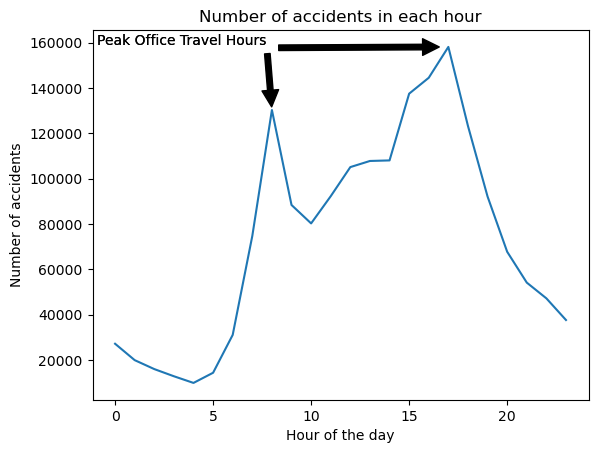

In [30]:
sns.lineplot(
    data=accidents.groupby(['Hours']).size().reset_index(name='count'), 
    x='Hours', y='count')
plt.xlabel("Hour of the day")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each hour")
plt.annotate('Peak Office Travel Hours', xy=(8, 130305), xycoords='data',
            xytext=(0.01, .99), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Peak Office Travel Hours', xy=(17, 158132), xycoords='data',
            xytext=(0.01, .99), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

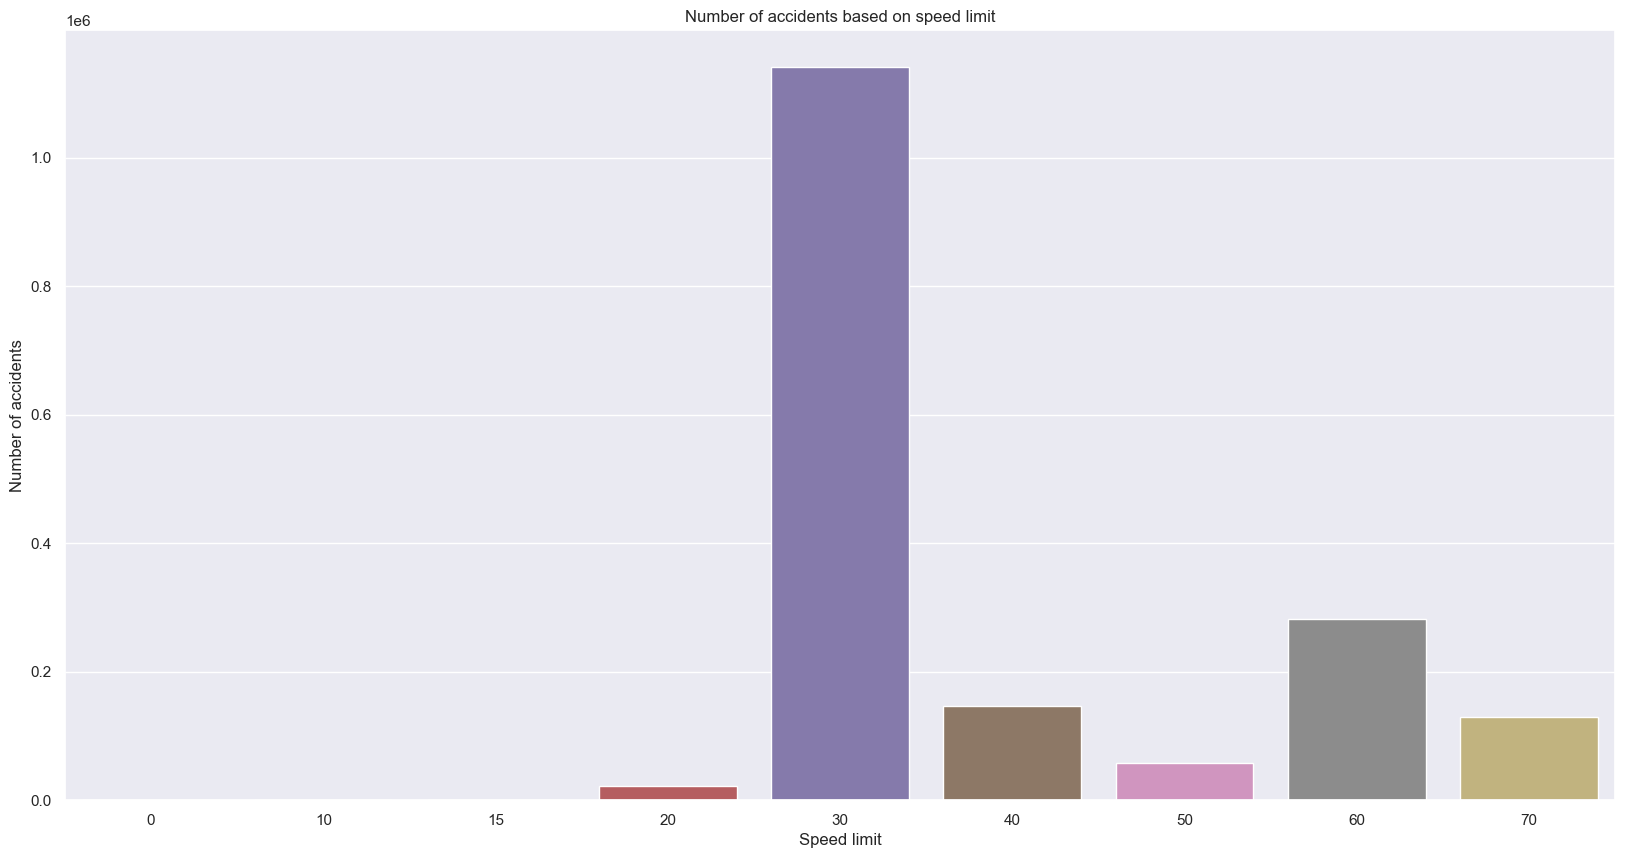

In [143]:
sns.countplot(data=accidents, x="Speed_limit")
plt.xlabel("Speed limit")
plt.ylabel("Number of accidents")
plt.title("Number of accidents based on speed limit")
plt.show()

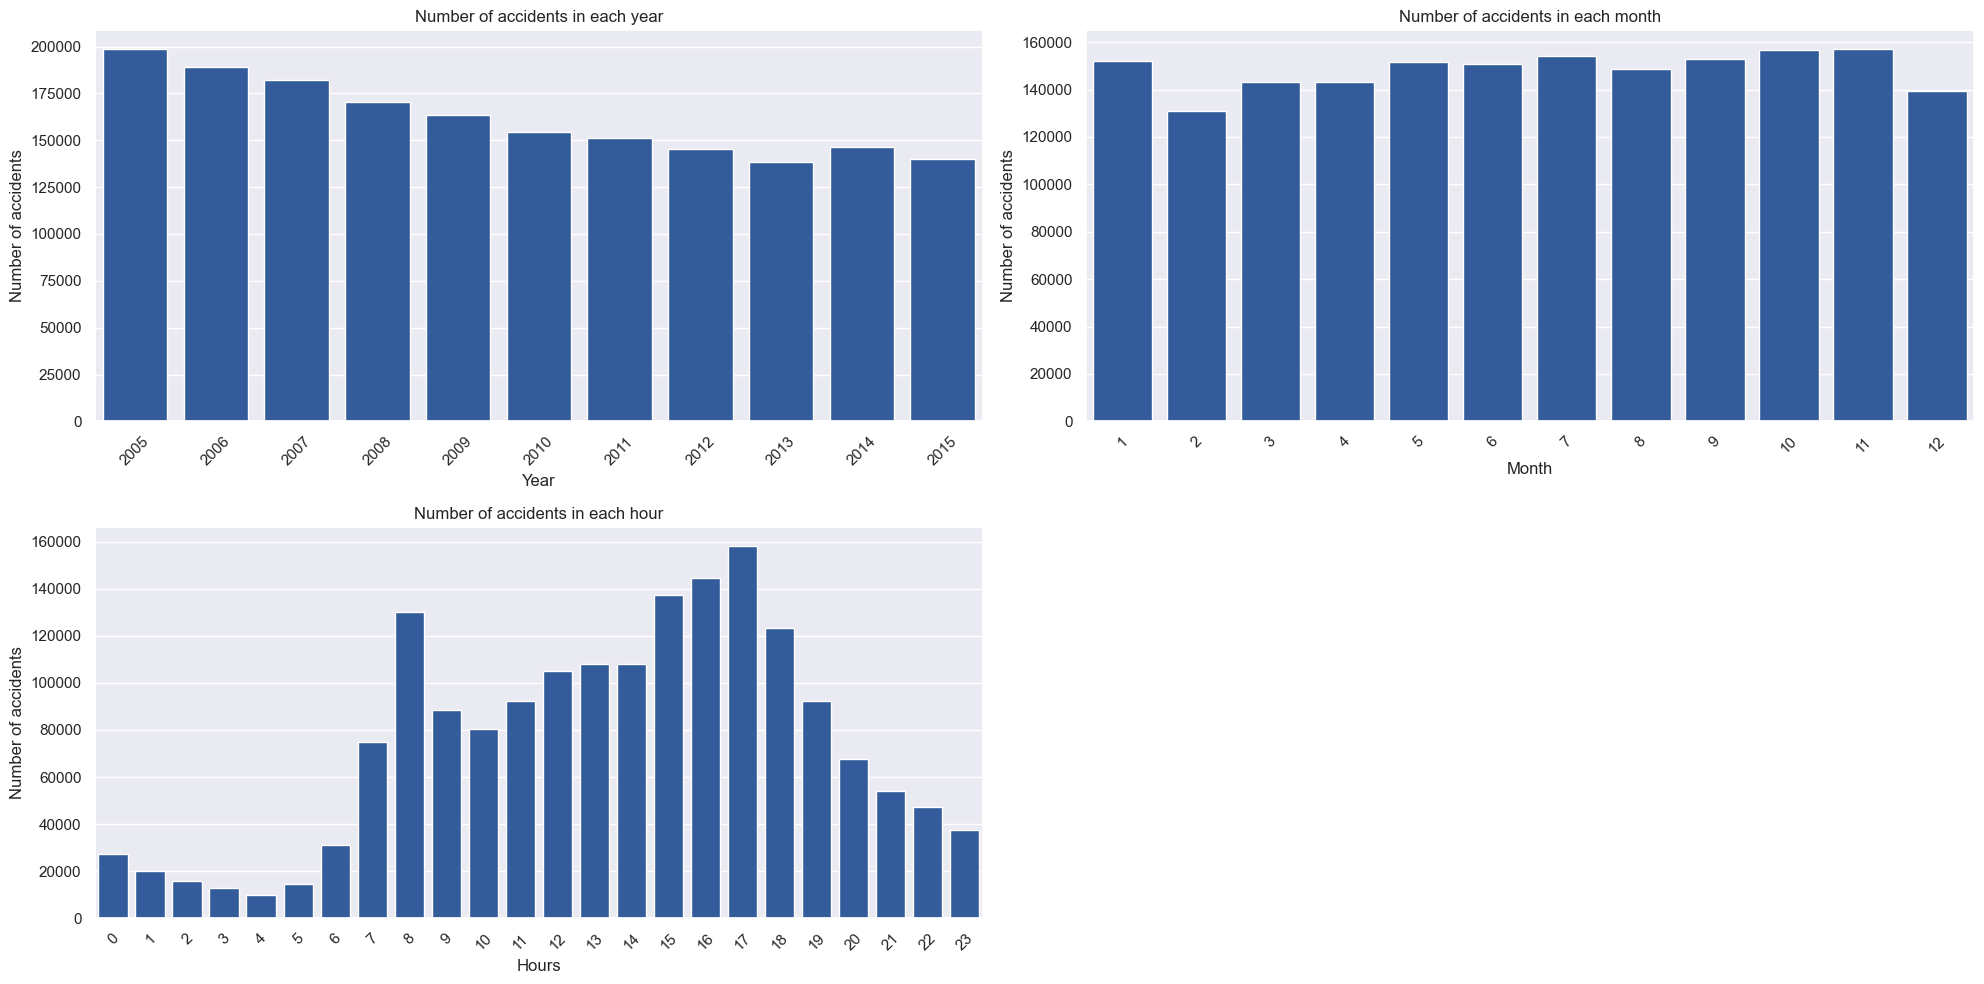

In [41]:
sns.set(rc={'figure.figsize':(20,10)})

plt.subplot(2, 2, 1)
sns.countplot(data=accidents, x="Year", color='#2358AC')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each year")

# using subplot function and creating plot two
plt.subplot(2, 2, 2)
sns.countplot(data=accidents, x="Month", color='#2358AC')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each month")

plt.subplot(2, 2, 3)
sns.countplot(data=accidents, x="Hours", color='#2358AC')
plt.xticks(rotation=45)
plt.xlabel("Hours")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each hour")

plt.tight_layout()
plt.show()

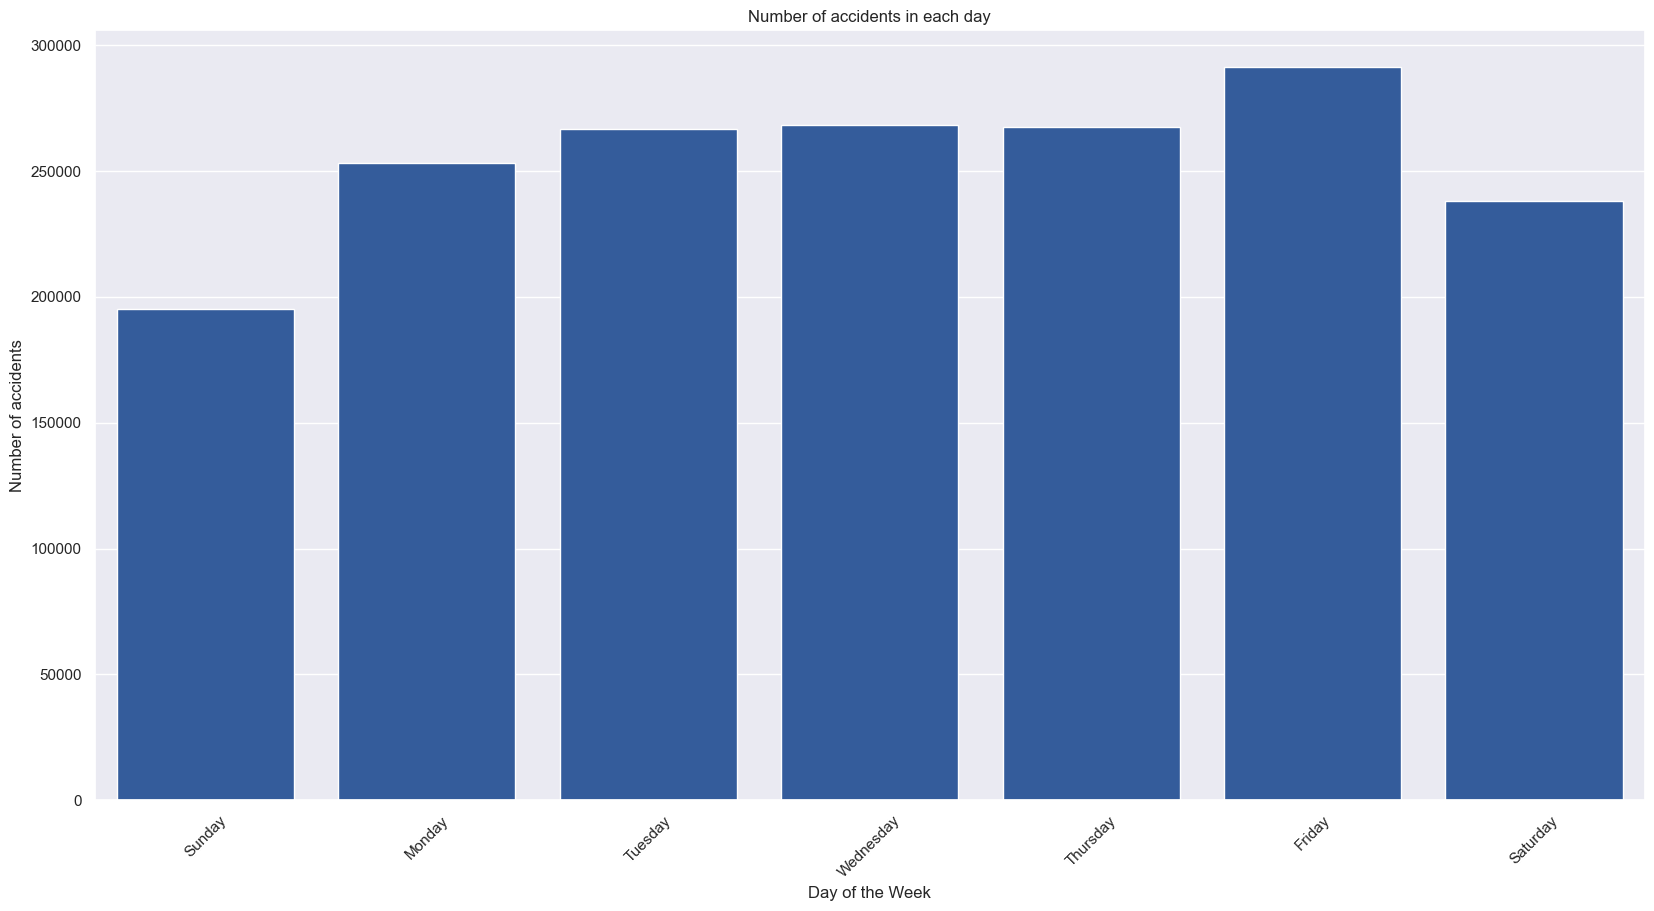

In [42]:
sns.countplot(data=accidents, x="Day_of_Week", color='#2358AC', order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each day")
plt.show()

In [48]:
casualties = pd.read_csv("./data/casualties.csv",error_bad_lines=False,warn_bad_lines=False)

C:\Users\SJoshi\AppData\Local\Temp\ipykernel_9000\617635124.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  casualties = pd.read_csv("./data/casualties.csv",error_bad_lines=False,warn_bad_lines=False)
C:\Users\SJoshi\AppData\Local\Temp\ipykernel_9000\617635124.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  casualties = pd.read_csv("./data/casualties.csv",error_bad_lines=False,warn_bad_lines=False)


In [49]:
casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [50]:
casualties.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [51]:
casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [56]:
casualties["Age_Group"] = pd.cut(casualties['Age_of_Casualty'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100], right=False, labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+" ])

In [57]:
casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Age_Group
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1,30-40
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1,30-40
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,60-70
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1,30-40
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1,40-50


<AxesSubplot: xlabel='Age_Group', ylabel='Count'>

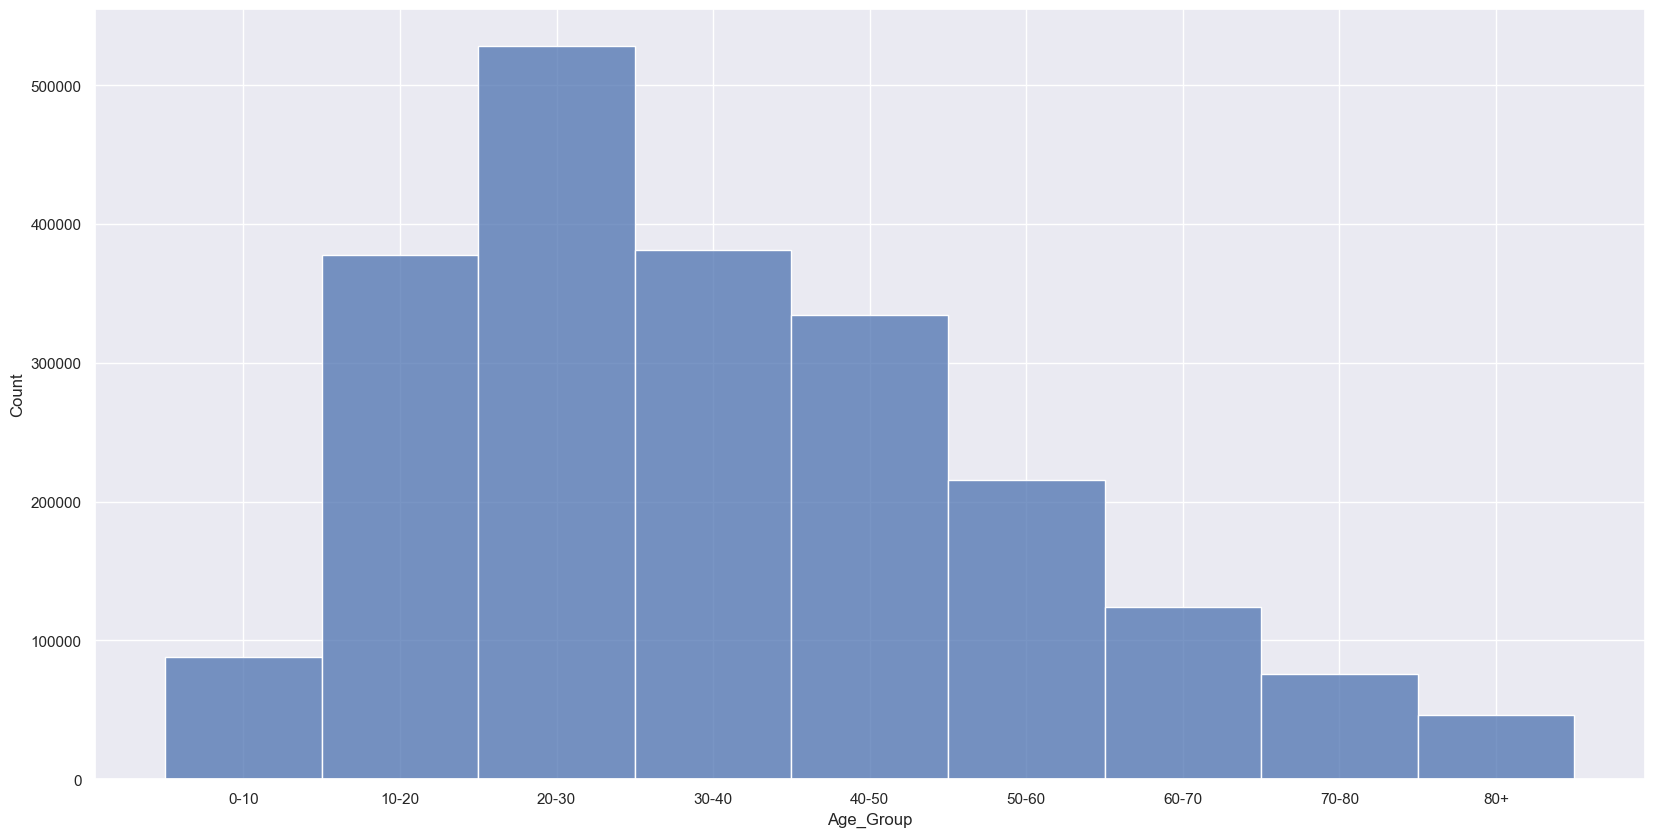

In [59]:
sns.histplot(data=casualties, x="Age_Group")

<AxesSubplot: xlabel='Age_Group', ylabel='Count'>

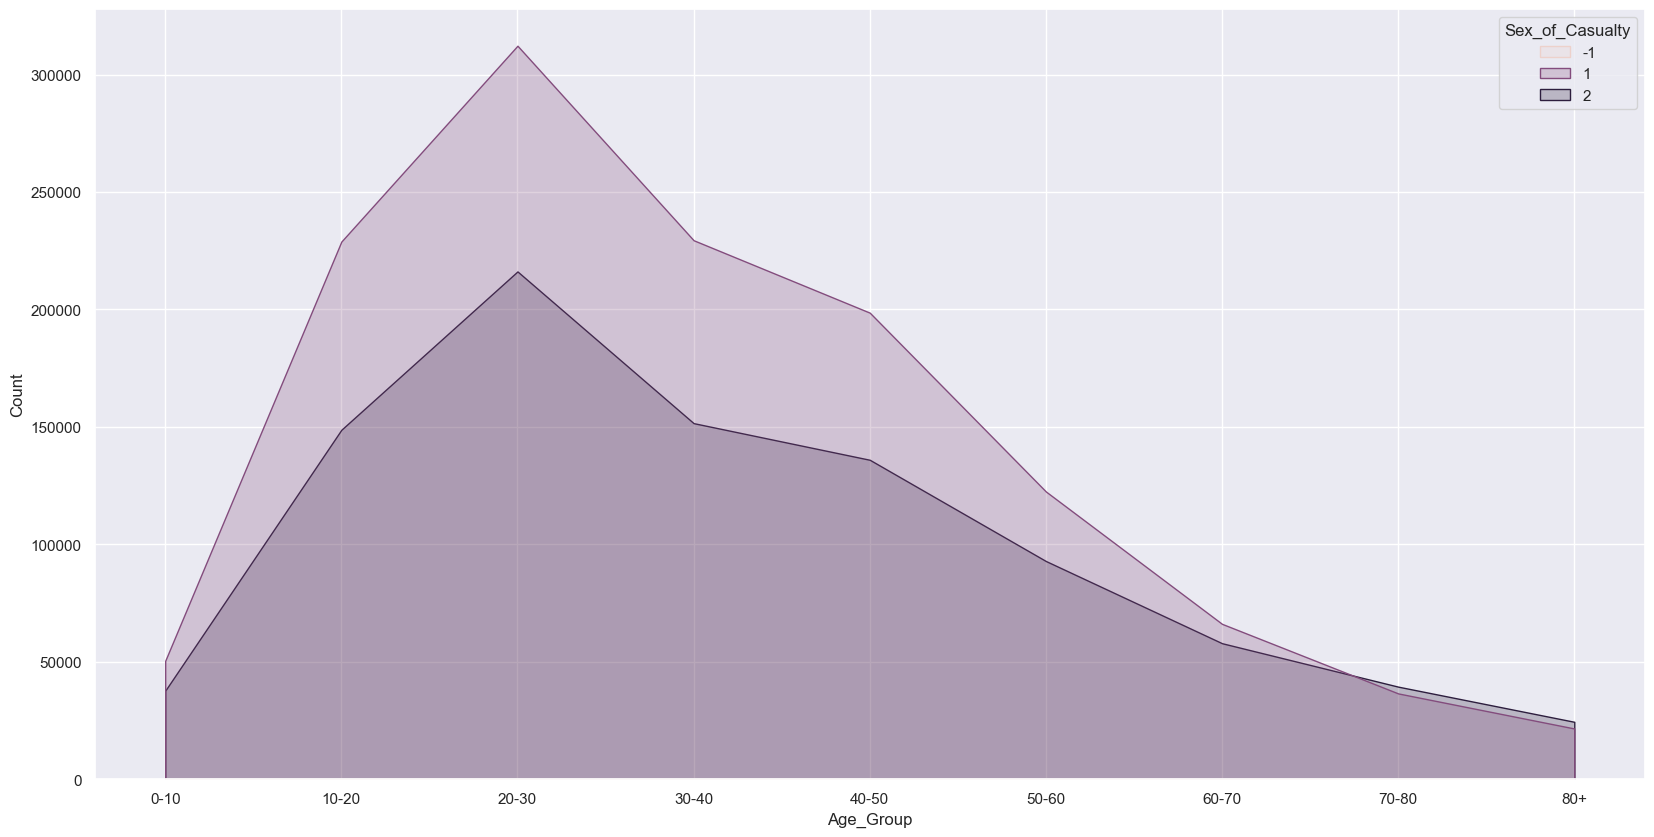

In [61]:
sns.histplot(data=casualties, x="Age_Group", hue="Sex_of_Casualty", element="poly")

In [70]:
casualties["Casualty_Severity"] = casualties["Casualty_Severity"].astype(object)

<AxesSubplot: xlabel='Age_of_Casualty'>

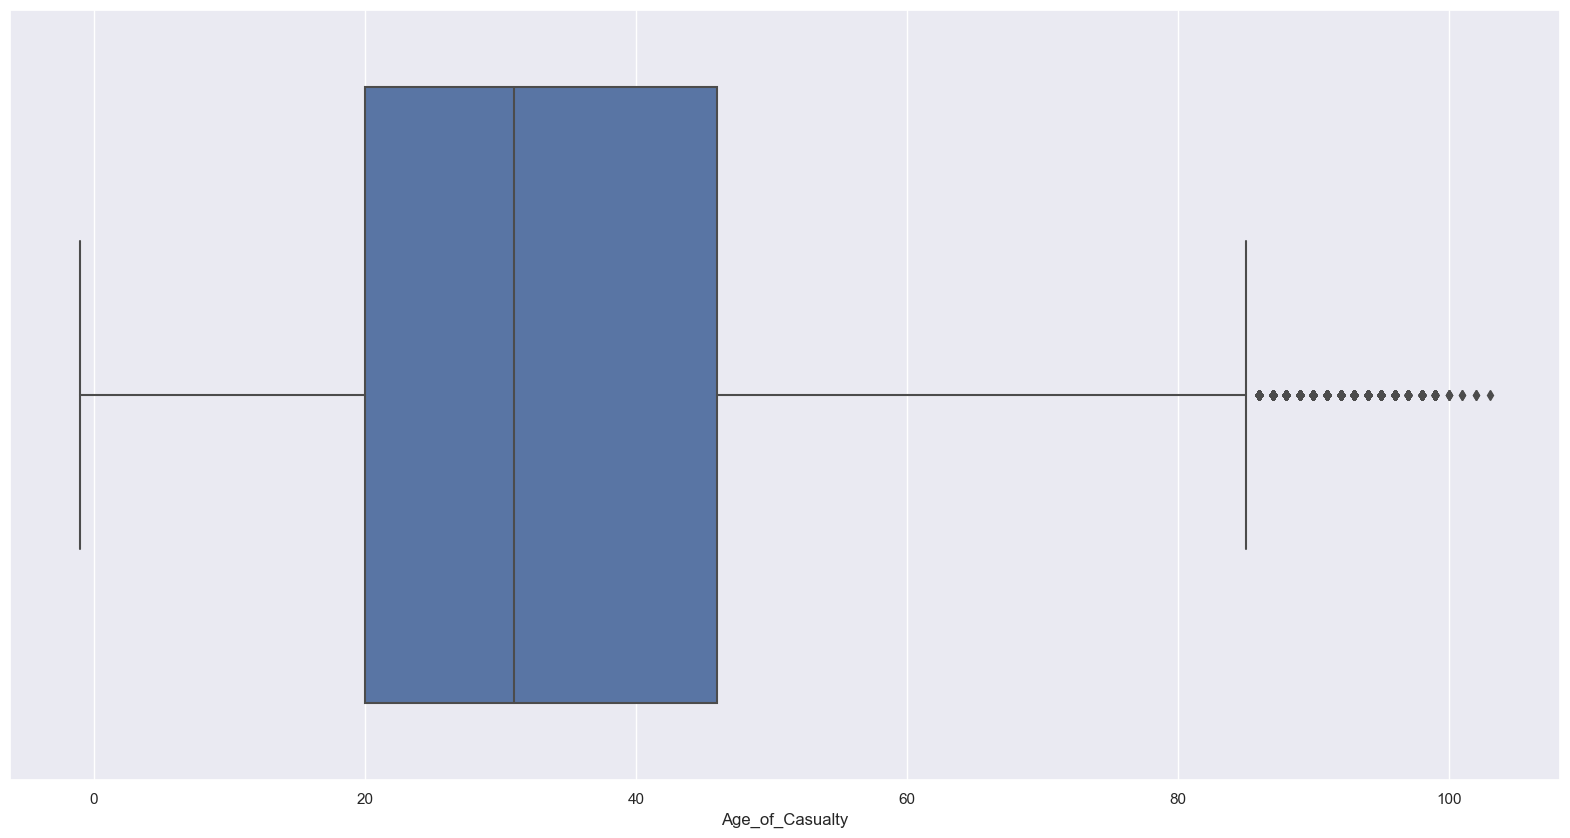

In [72]:
sns.boxplot(data=casualties, x="Age_of_Casualty", hue="Casualty_Severity")

In [76]:
new_data = {-1: "Unknown", 1:"Male",
           2:"Female"}
casualties["Sex_of_Casualty"] = casualties["Sex_of_Casualty"].map(new_data)

<AxesSubplot: xlabel='Age_of_Casualty'>

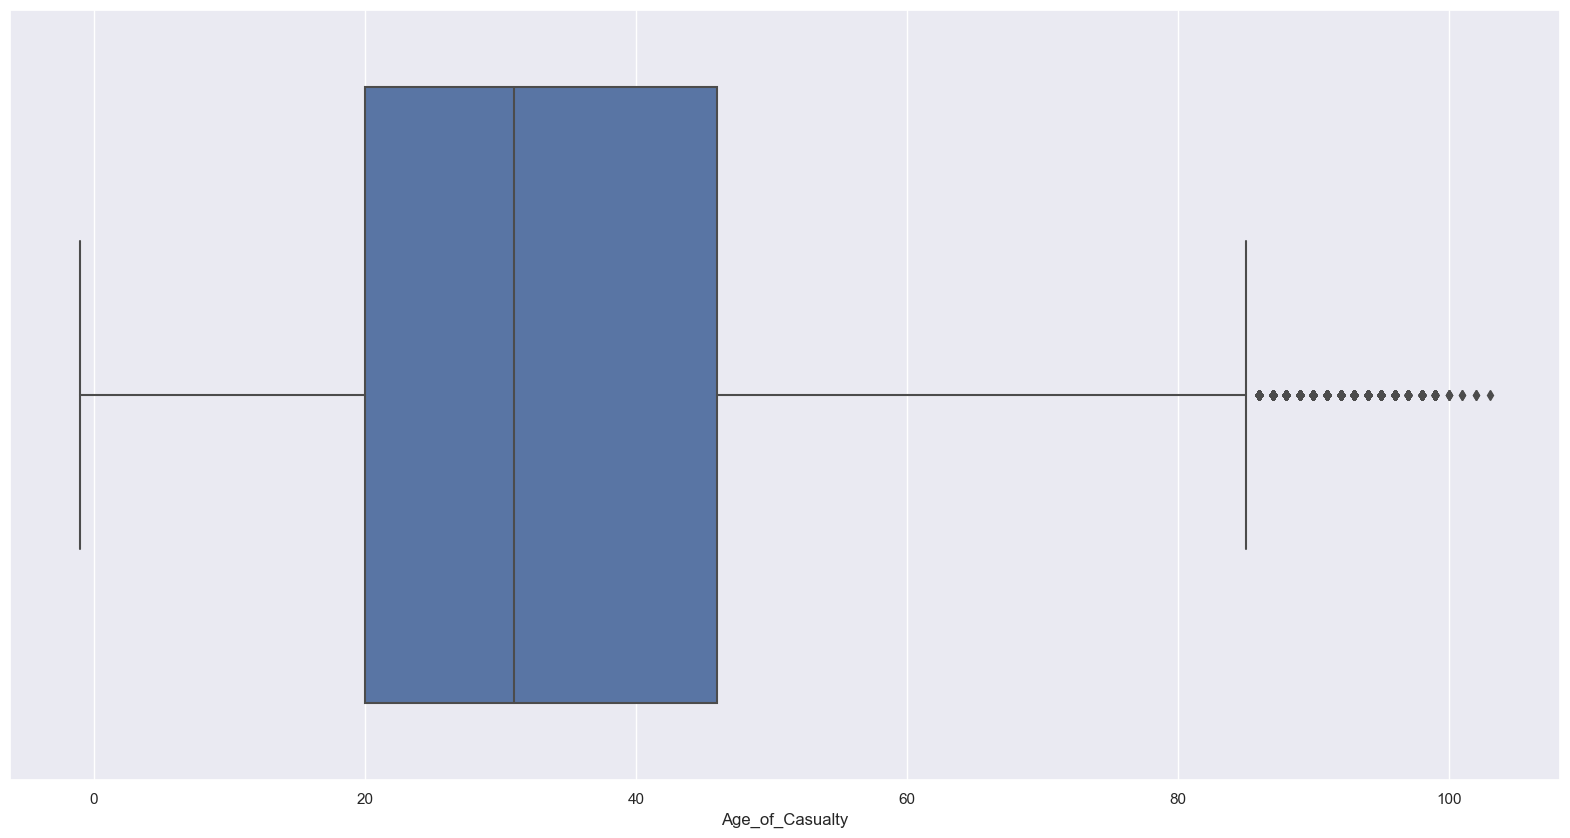

In [79]:
sns.boxplot(data=casualties, x="Age_of_Casualty", hue="Sex_of_Casualty")

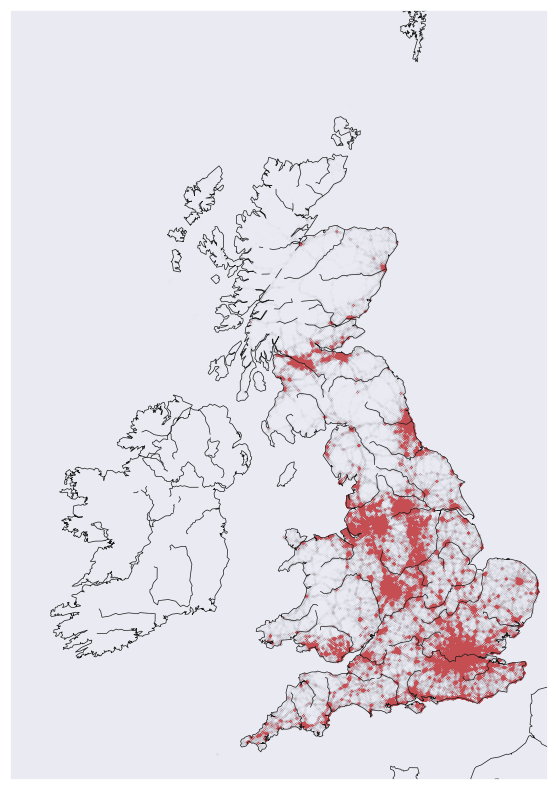

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd


new_accidents = accidents.dropna()

# Create a map object
map_uk = Basemap(
    projection='merc',
    llcrnrlat=49.5,
    urcrnrlat=60.5,
    llcrnrlon=-11.5,
    urcrnrlon=2.0,
    resolution='i'
)

# Draw coastlines, countries, and rivers
map_uk.drawcoastlines(linewidth=0.5)
map_uk.drawcountries(linewidth=0.5)
map_uk.drawrivers(linewidth=0.5)

# Plot scatter points for each location in the dataframe
x, y = map_uk(new_accidents['Longitude'].values, new_accidents['Latitude'].values)
map_uk.scatter(x, y, marker='o', color='r', alpha=1, s=0.00001)

# Display the map
plt.show()

In [107]:
accidents.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hours', 'Year', 'Month', 'Day'],
      dtype='object')

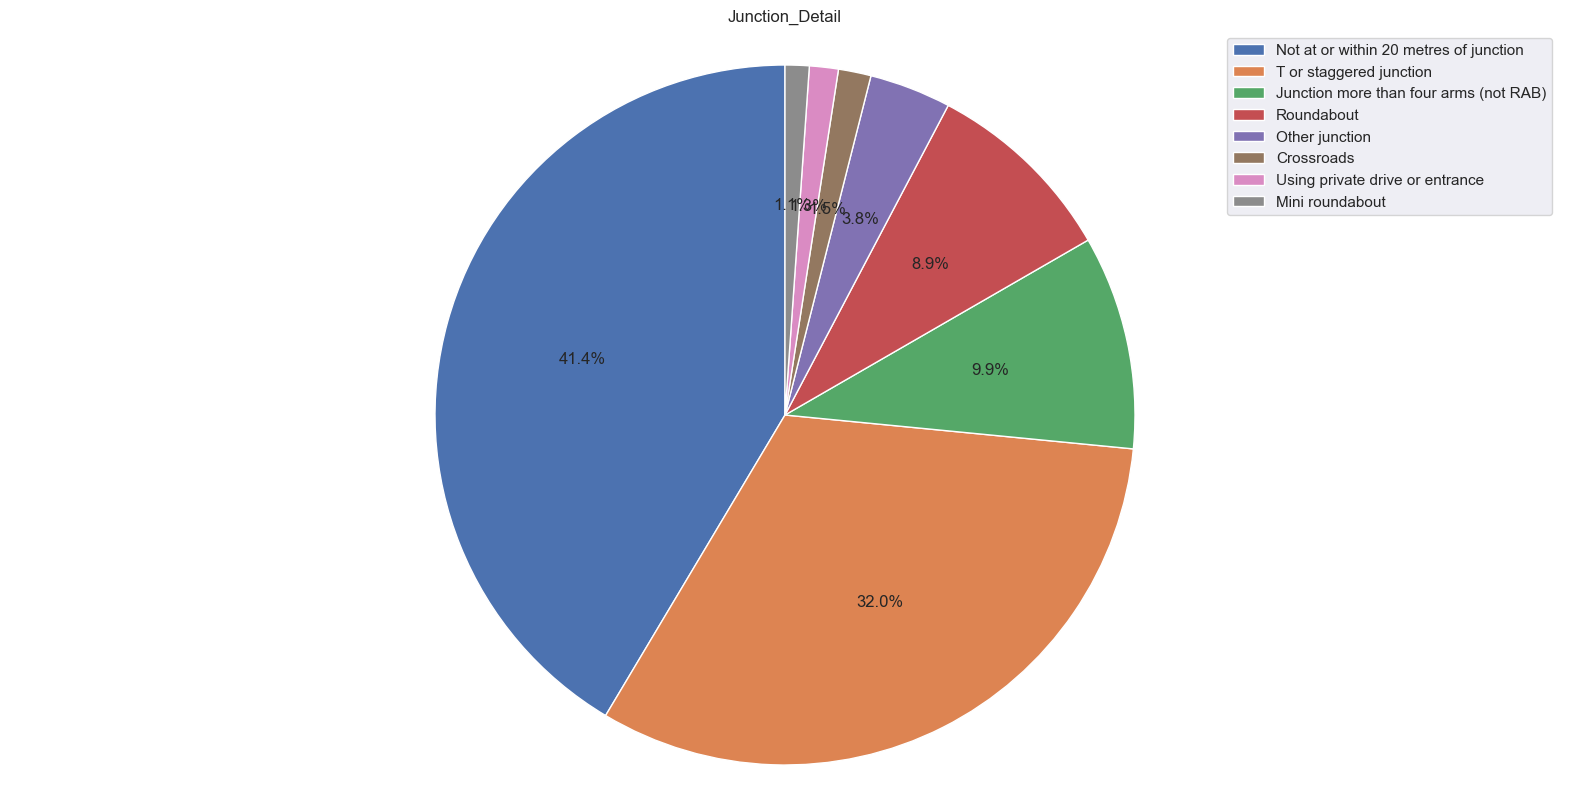

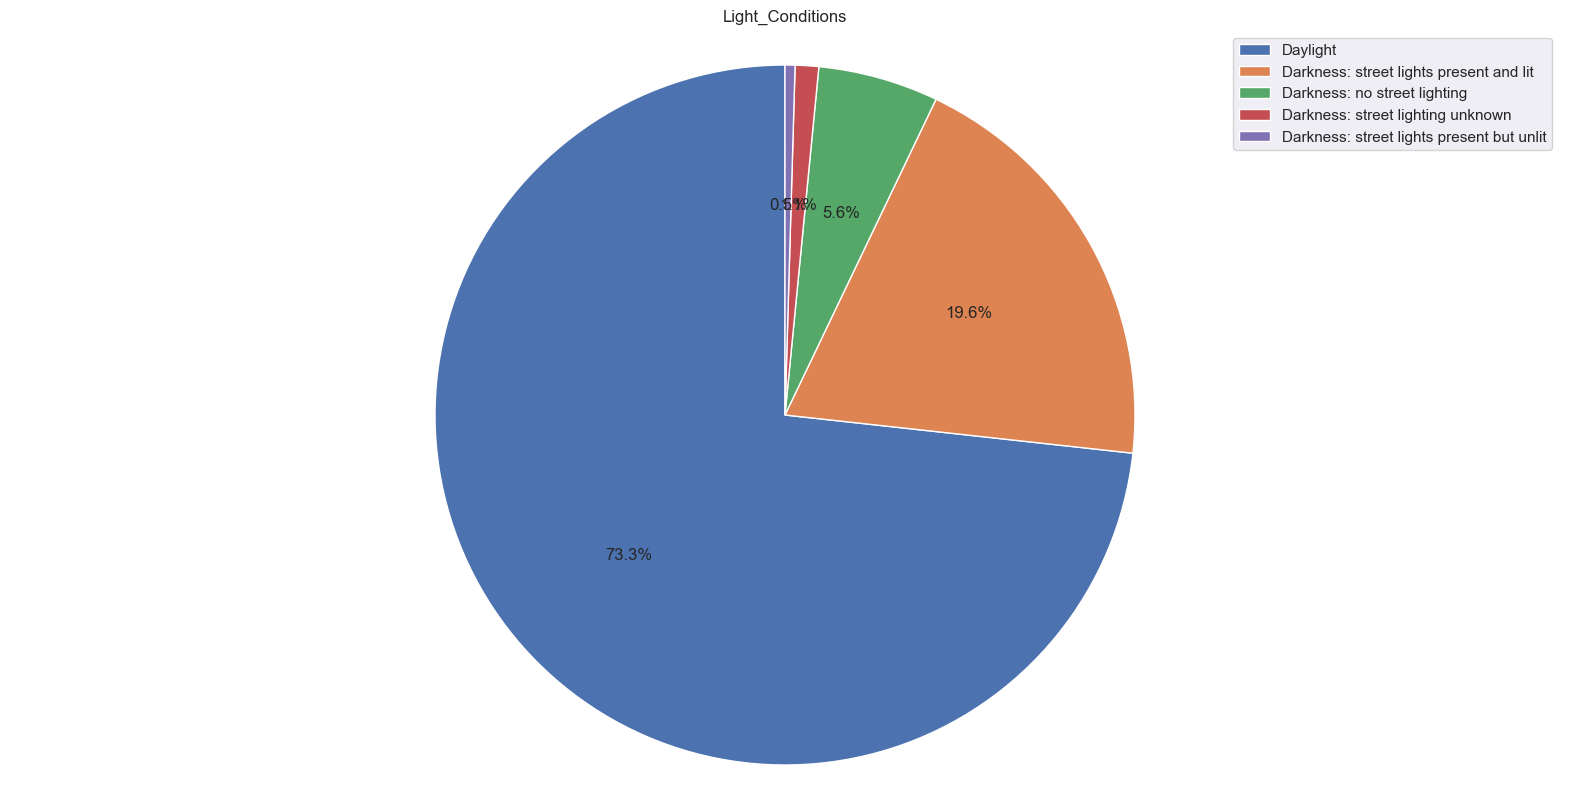

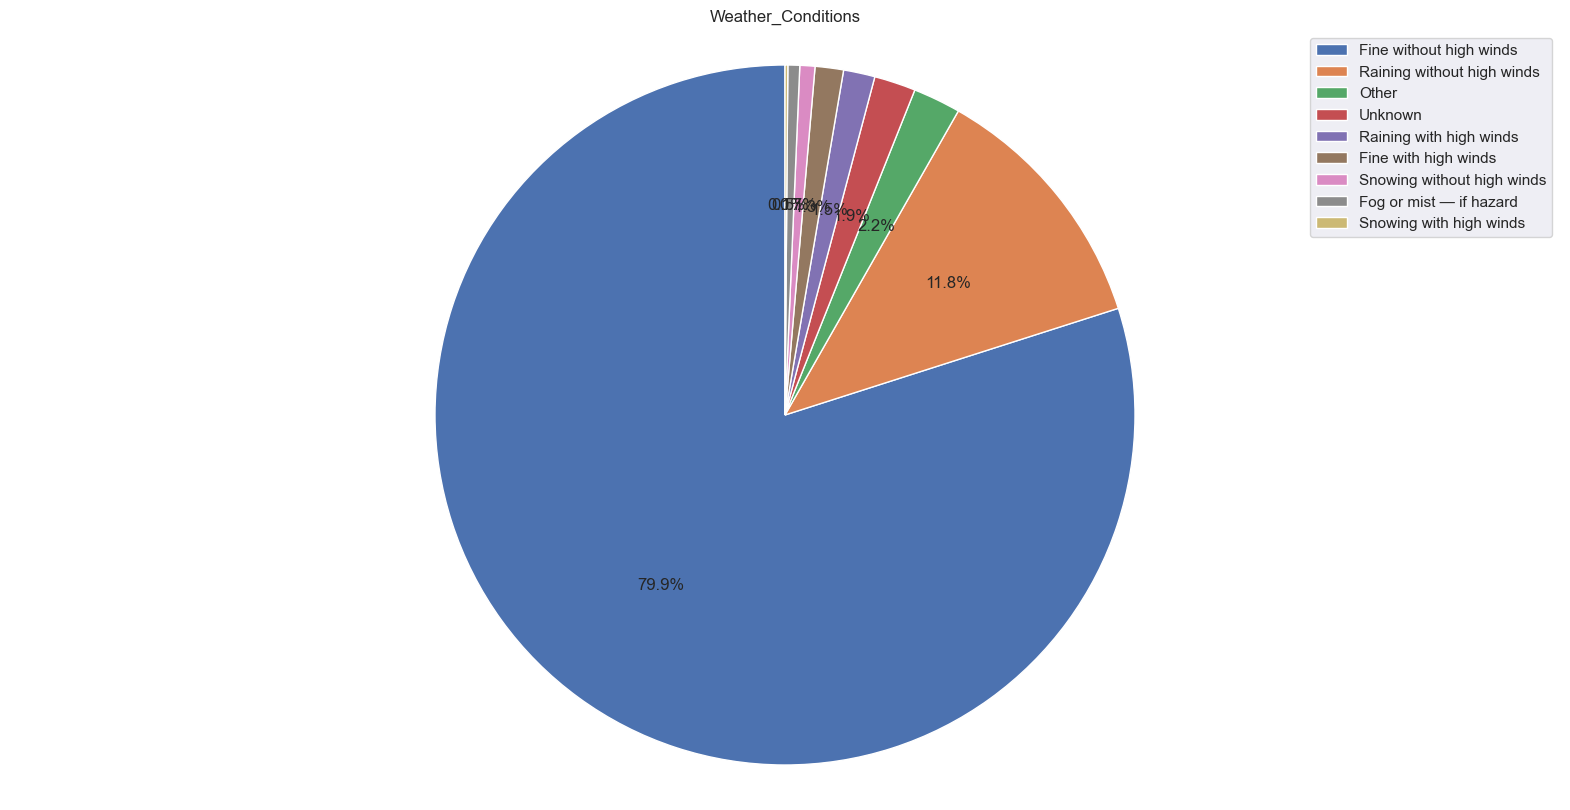

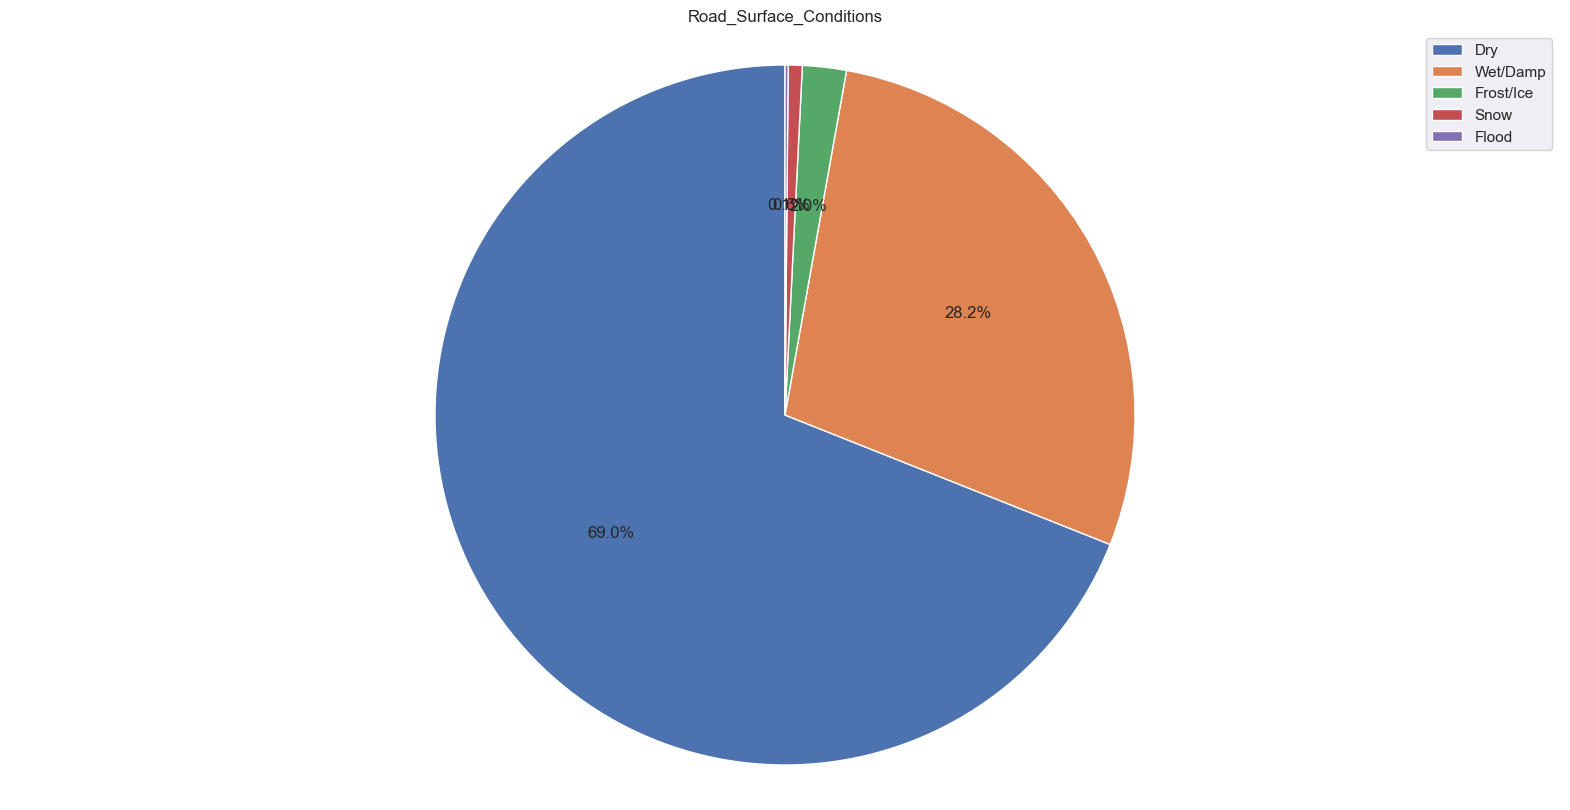

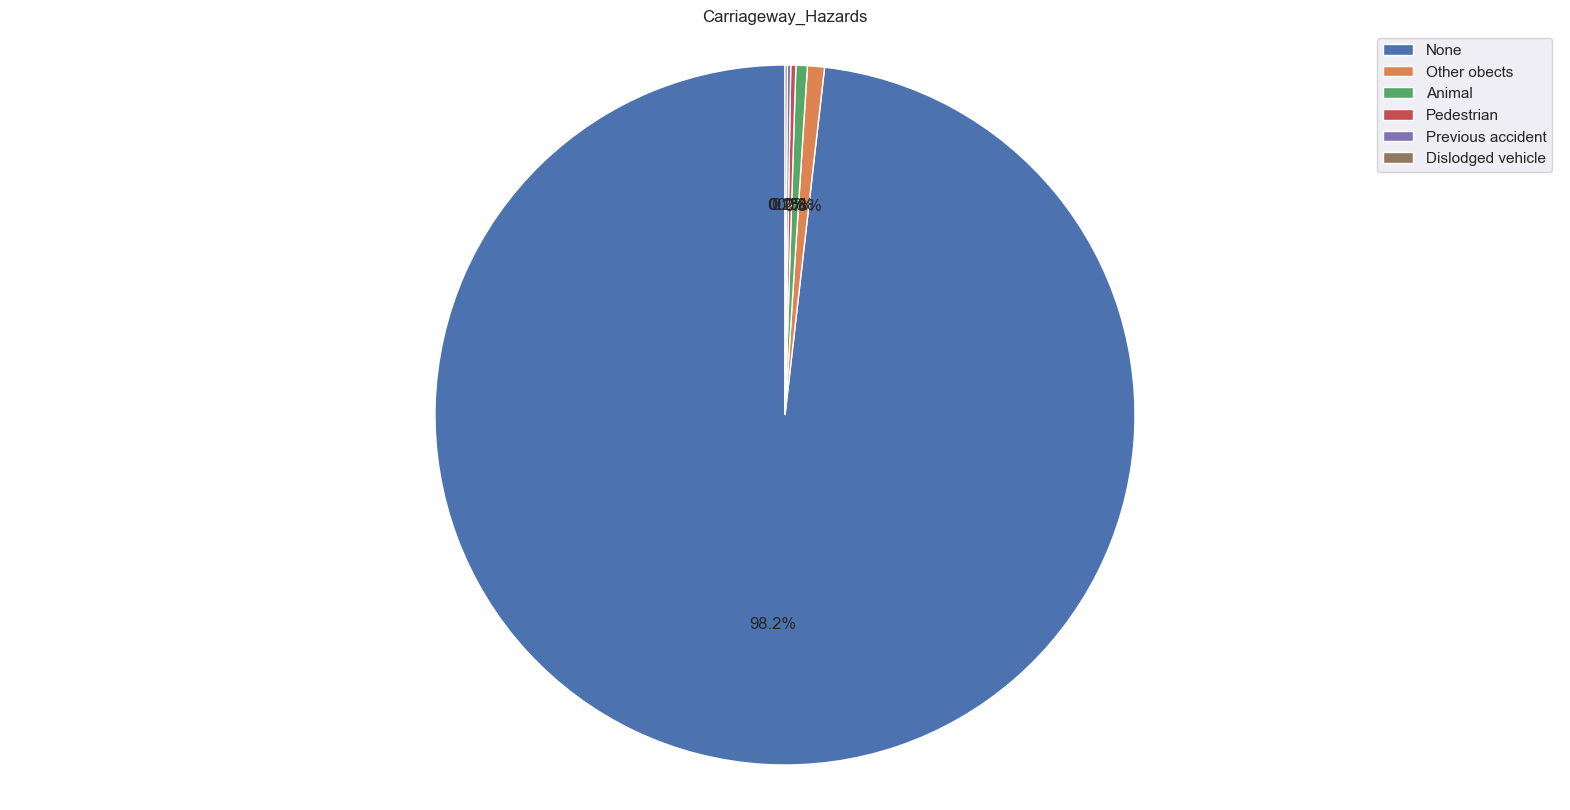

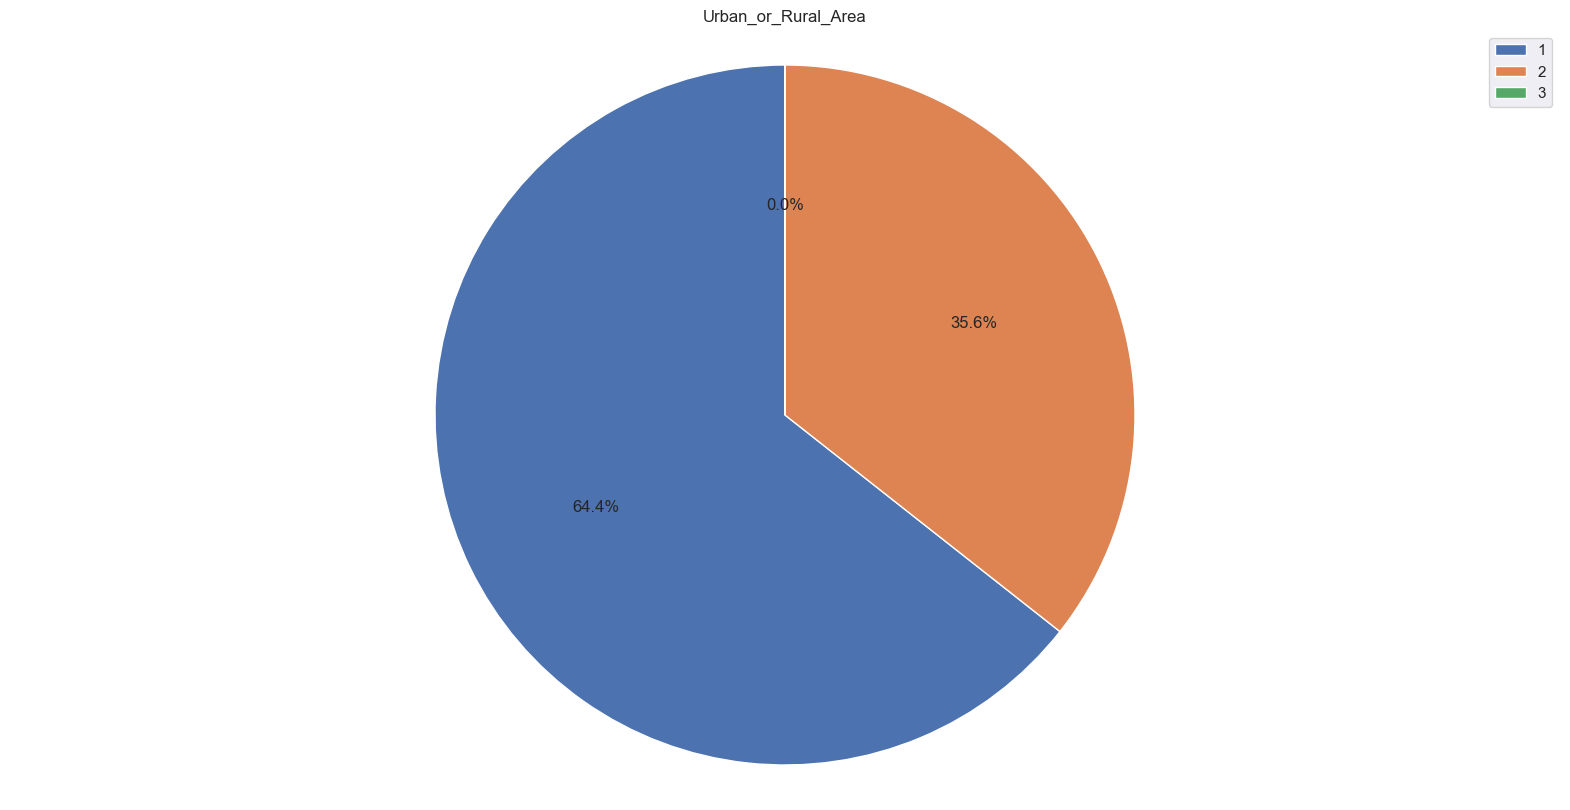

In [121]:
cols = ["Junction_Detail", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Carriageway_Hazards", "Urban_or_Rural_Area"]
for col in cols:
    counts = accidents[col].value_counts()
    plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(col)
    plt.legend(pd.DataFrame(counts).reset_index()["index"])
    plt.show()